In [49]:
# Dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

In [50]:
#supressing scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Make a reference to the blockbusters.csv file path
file_one = Path("Resources/blockbusters.csv")

# Import the blockbusters.csv file as a DataFrame
movies_df = pd.read_csv(file_one, encoding="utf-8")

# Check the information has been imported correctly
movies_df.tail()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
432,Thriller,Crime,Comedy,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.40,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975
436,Drama,Western,War,6.40,103,10,PG,Universal Pictures,The Other Side of the Mountain,"$34,673,100.00",1975


In [51]:
#rename Columns in the DF with subgenres (keep for later!)
movies_df = movies_df.rename(columns={'Main_Genre': 'Main Genre', 'Genre_2': 'Subgenre 1', 'Genre_3': 'Subgenre 2', 'imdb_rating': 'IMDB Rating', 'length': 'Length', 'rank_in_year': 'Rank In Year', 'rating': 'Rating', 'studio': 'Production Studio', 'title': 'Movie Title', 'worldwide_gross': 'Worldwide Gross', 'year': 'Year'})

#delete the subgenre columns
clean_df = movies_df.drop(['Subgenre 1', 'Subgenre 2'], axis=1)

clean_df

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


In [52]:
#focus on the Main Genre for the dataset so that we have a large data set
grouped_df = clean_df.groupby('Year')['Main Genre'].value_counts()
grouped_df

Year  Main Genre
1975  Drama         3
      Family        1
      Music         1
      Romance       1
      Thriller      1
                   ..
2017  Horror        1
      Music         1
2018  Action        8
      Animation     1
      Music         1
Name: Main Genre, Length: 265, dtype: int64

In [53]:
#change the Worldwide Gross column type to numeric
clean_df['Worldwide Gross'] = clean_df['Worldwide Gross'].str.replace('$', '').str.replace(',', '')
clean_df['Worldwide Gross'] = pd.to_numeric(clean_df['Worldwide Gross'])
clean_df

/var/folders/w4/98f2t0sx0bx10pqb3r31kc0h0000gn/T/ipykernel_20118/2167410920.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_df['Worldwide Gross'] = clean_df['Worldwide Gross'].str.replace('$', '').str.replace(',', '')


,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
0,Action,7.40,135,1,PG-13,Walt Disney Pictures,Black Panther,"700,059,566.00",2018
1,Action,8.50,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"678,815,482.00",2018
2,Animation,7.80,118,3,PG,Pixar,Incredibles 2,"608,581,744.00",2018
3,Action,6.20,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"416,769,345.00",2018
4,Action,7.80,119,5,R,20th Century Fox,Deadpool 2,"318,491,426.00",2018
...,...,...,...,...,...,...,...,...,...
432,Thriller,7.10,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"41,833,347.00",1975
433,Music,6.40,136,7,PG,Columbia Pictures,Funny Lady,"39,000,000.00",1975
434,Family,6.20,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"36,853,000.00",1975
435,Drama,6.00,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","35,000,000.00",1975


In [54]:
#look for the top 10 highest grossing movies between 1975 and 2018
highest_gross = clean_df.nlargest(10, 'Worldwide Gross')

#add the $ back into the column
highest_gross["Worldwide Gross"] = highest_gross["Worldwide Gross"].map("${:,.2f}".format)
highest_gross

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
90,Fantasy,7.90,162,1,PG-13,20th Century Fox,Avatar,"$2,749,064,328.00",2009
210,Romance,7.70,194,1,PG-13,Paramount Pictures,Titanic,"$1,843,201,268.00",1997
60,Sci-Fi,8.20,143,1,PG-13,Walt Disney Pictures,The Avengers,"$1,518,594,910.00",2012
70,Thriller,8.10,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,"$1,341,511,219.00",2011
50,Comedy,7.70,102,1,PG,Walt Disney Pictures,Frozen,"$1,274,219,009.00",2013
51,Sci-Fi,7.30,130,2,PG-13,Walt Disney Pictures,Iron Man 3,"$1,215,439,994.00",2013
71,Sci-Fi,6.30,154,2,PG-13,Paramount Pictures,Transformers: Dark of the Moon,"$1,123,794,079.00",2011
150,Fantasy,8.90,201,1,PG-13,Warner Bros,The Lord of the Rings: The Return of the King,"$1,119,929,521.00",2003
61,Thriller,7.80,143,2,PG-13,Metro-Goldwyn-Mayer,Skyfall,"$1,108,561,013.00",2012
40,Sci-Fi,5.80,165,1,PG-13,Paramount Pictures,Transformers: Age of Extinction,"$1,091,404,499.00",2014


In [65]:
sorted_data = highest_gross.sort_values('Worldwide Gross', ascending=True)
sorted_data

,Main Genre,IMDB Rating,Length,Rank In Year,Rating,Production Studio,Movie Title,Worldwide Gross,Year
40,Sci-Fi,5.80,165,1,PG-13,Paramount Pictures,Transformers: Age of Extinction,"$1,091,404,499.00",2014
61,Thriller,7.80,143,2,PG-13,Metro-Goldwyn-Mayer,Skyfall,"$1,108,561,013.00",2012
150,Fantasy,8.90,201,1,PG-13,Warner Bros,The Lord of the Rings: The Return of the King,"$1,119,929,521.00",2003
71,Sci-Fi,6.30,154,2,PG-13,Paramount Pictures,Transformers: Dark of the Moon,"$1,123,794,079.00",2011
51,Sci-Fi,7.30,130,2,PG-13,Walt Disney Pictures,Iron Man 3,"$1,215,439,994.00",2013
50,Comedy,7.70,102,1,PG,Walt Disney Pictures,Frozen,"$1,274,219,009.00",2013
70,Thriller,8.10,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,"$1,341,511,219.00",2011
60,Sci-Fi,8.20,143,1,PG-13,Walt Disney Pictures,The Avengers,"$1,518,594,910.00",2012
210,Romance,7.70,194,1,PG-13,Paramount Pictures,Titanic,"$1,843,201,268.00",1997
90,Fantasy,7.90,162,1,PG-13,20th Century Fox,Avatar,"$2,749,064,328.00",2009


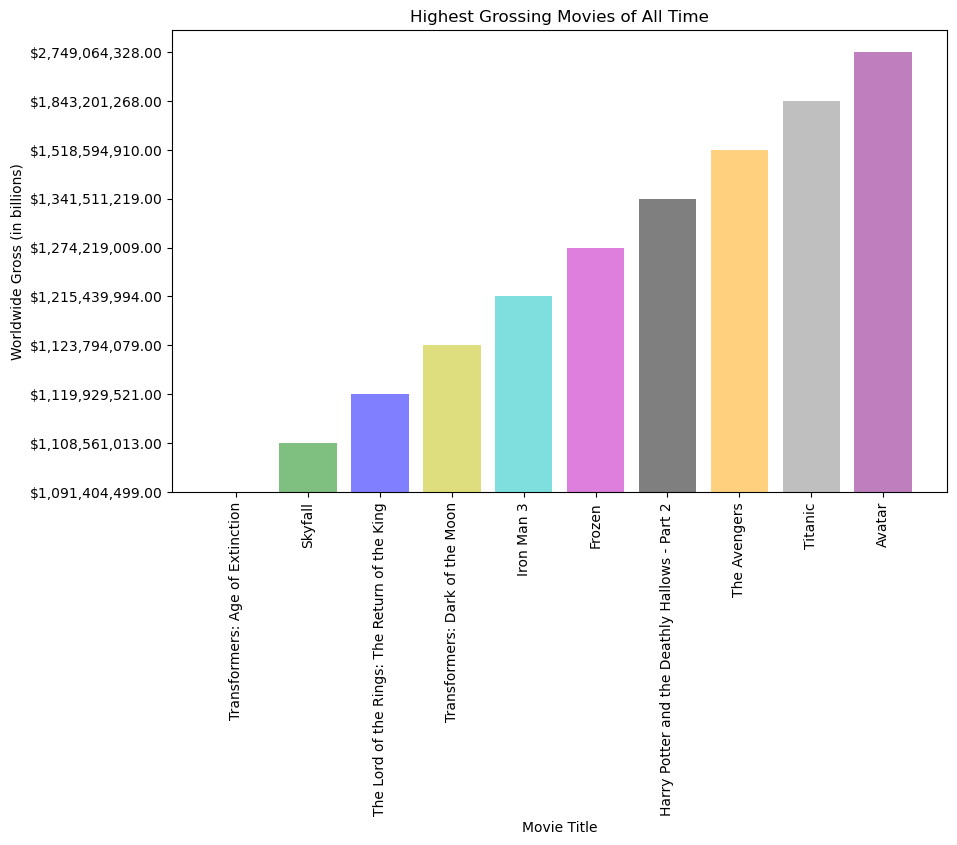

In [81]:
#Plot bar showing the highest Worldwide Gross and the movies
# sort the data by worldwide gross and create x_axis and y_axis
sorted_data = highest_gross.sort_values('Worldwide Gross', ascending=True)
x_axis = sorted_data['Movie Title']
y_axis = sorted_data['Worldwide Gross']

# create a list of custom colors with the same length as x_axis
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'gray', 'purple']

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.bar(x_axis, y_axis, color=colors, alpha=0.5, align="center")

# set the title and axis labels
ax.set_title("Highest Grossing Movies of All Time")
ax.set_xlabel("Movie Title")
ax.set_ylabel("Worldwide Gross (in billions)")

# set the tick labels to be vertical and spaced out
ax.set_xticks(range(len(x_axis)))
ax.set_xticklabels(x_axis, rotation=90)

plt.show()


In [58]:
#production company we will use a scatter plot with trendline x axis = production company and y axis = how much money was made

In [59]:
#what taylor gave us: 
#http://www.omdbapi.com/?apikey=[yourkey]&type=movie&y=2018
#http://www.omdbapi.com/?apikey=[yourkey]&type=movie&y=2019

In [60]:
# Make a request to the OMDb API for each movie in the list.
for movie in movies:
    movie_data = requests.get(url + movie).json()
   # Print the responses
    responses

NameError: name 'movies' is not defined

In [61]:
#defining lists
Title = []
Year = []
Released = []
Genre = []
Awards = []
BoxOffice = []
Type = []

In [ ]:
# create dataframe
#printing data set necessary 
movies_df = pd.DataFrame({'Title': Title, 'Year': Year, 'Genre': Genre, 'Awards': Awards, 'BoxOffice': BoxOffice, 'Released': Released, 'Type': Type})
movies_df.head()

In [ ]:
# declare variables 

In [ ]:
# append data to the variable